In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

In [2]:
data = pd.read_hdf('./budyko_working.hdf','df')
# define a function for computing the EI from a given DI
def budyko(DI):
    return np.sqrt(DI*np.tanh(1/DI)*(1-np.exp(-DI)))
data['PETpenvic_P'] = data['PETpenmanvic']/data['P'] # compute the dryness index
data['ET_P'] = data['ET']/data['P'] # compute the evaporative index
DI = np.arange(0,50.001,0.001) # make a range to compute the budyko curve over
EI = budyko(DI) # compute the Budyko Curve
data['pred_EI'] = data['PETpenvic_P'].apply(budyko) # compute the predicted evaportative index for each cell given its aridity
data['Q_P'] = 1.-data['ET_P'] # compute actual runoff for each cell 
data['Qpred_P'] = 1.-data['pred_EI'] # compute predicted runoff for each cell
data['Qanom_P'] = data['Q_P']-data['Qpred_P'] # compute the anomoly (actual - predicted)
data['Q'] = data.Q_P*data.P # compute Q not normalized by P
data['Qanom'] = data.Qanom_P*data.P
regions = ['Cascades','East Cascades','North Cascades','Sierra','Northern Rockies','Middle Rockies',
           'Canadian Rockies','Idaho Batholith','Wasatch',
           'Southern Rockies']

regs = [1,2,3,4,6,7,8,9,12,13]
regcs = [2,3,6,8,7,5,1,4,10,9]

In [3]:
data.columns

Index([u'frlon', u'PETpenmanvic', u'P', u'ET', u'frlat', u'Sf',
       u'meanablseason', u'meandosnowfree', u'meanpeakswe', u'meanpeaket',
       u'meandopeaket', u'lon_x', u'meanablslope', u'lat_x', u'meandopeakswe',
       u'infilt', u'fs_active', u'l1_quartz', u'l3_Wpwp_FRACT', u'l3_bulkD',
       u'l3_init_moist', u'annual_prec', u'l2_soil_density', u'l2_Ksat',
       u'rough', u'l2_Wcr_FRACT', u'l2_depth', u'l2_quartz', u'l1_phi_s',
       u'l3_bubble', u'l1_expt', u'Ws', u'l1_Ksat', u'l1_soil_density',
       u'l1_resid_moisture', u'l2_phi_s', u'l2_init_moist', u'l2_expt',
       u'l1_init_moist', u'l1_depth', u'off_gmt', u'l3_expt', u'l3_depth',
       u'Dsmax', u'l1_Wpwp_FRACT', u'l3_resid_moisture', u'avg_T',
       u'l3_soil_density', u'l3_phi_s', u'dp', u'c', u'l2_bulkD', u'l2_bubble',
       u'l2_Wpwp_FRACT', u'l3_Ksat', u'l3_quartz', u'Ds', u'l1_bulkD',
       u'l1_bubble', u'l2_resid_moisture', u'elev', u'snow_rough',
       u'l1_Wcr_FRACT', u'l3_Wcr_FRACT', u'slope', u'r

In [4]:
data2 = data.loc[data.RR_pval<=0.05,:].copy()
data2 = data2.loc[data2.frlon<=-100,:].copy()
data2 = data2.loc[data2.RR_rsqrd>0.25,:].copy()

In [5]:
print len(data)
print len(data2)

309673
22205


In [9]:
def explr(xx,yy):
    X = data2[xx].as_matrix()
    y = data2[yy].as_matrix()
    X = sm.add_constant(X)

    mod = sm.OLS(y,X).fit()

    sns.jointplot(xx,yy,data=data2,kind='hex', joint_kws={'gridsize':50})
    #sns.lmplot(xx,yy,data=data2)

    print mod.summary()

## Explore What controls the slope and strength of the relationship


Possible Explanitory Variables:
- MAT
- Seasonality
- LAI
- Soil Depth
- infilt
- 


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     5070.
Date:                Wed, 10 Jun 2015   Prob (F-statistic):               0.00
Time:                        09:37:13   Log-Likelihood:                 54475.
No. Observations:               22205   AIC:                        -1.089e+05
Df Residuals:                   22203   BIC:                        -1.089e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0451      0.000    254.626      0.0

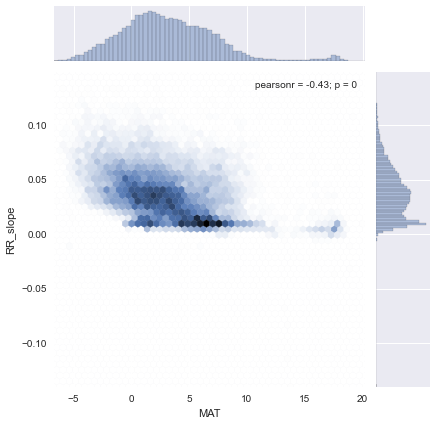

In [10]:
explr('MAT','RR_slope')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     1315.
Date:                Wed, 10 Jun 2015   Prob (F-statistic):          1.04e-279
Time:                        09:59:11   Log-Likelihood:                 9725.6
No. Observations:               22205   AIC:                        -1.945e+04
Df Residuals:                   22203   BIC:                        -1.943e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.5026      0.001    378.495      0.0

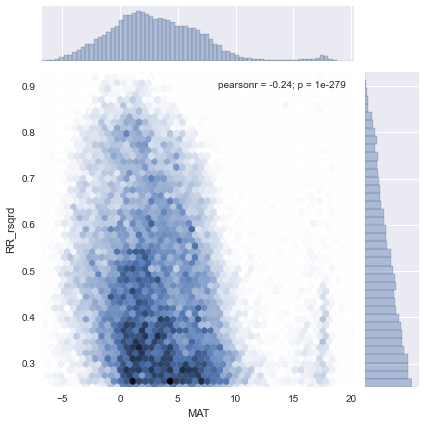

In [18]:
explr('MAT','RR_rsqrd')

In [27]:
mod

In [28]:
mod.summary()

ValueError: shapes (70539,2) and (70539,2) not aligned: 2 (dim 1) != 70539 (dim 0)

In [29]:
mod.rsquared

ValueError: shapes (70539,2) and (70539,2) not aligned: 2 (dim 1) != 70539 (dim 0)